# load covariances

In [2]:
import pickle

def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')
    
meas = load_obj('/global/homes/g/giannini/tSZ/results')

UnicodeDecodeError: 'ascii' codec can't decode byte 0x8d in position 0: ordinal not in range(128)

# Plot 

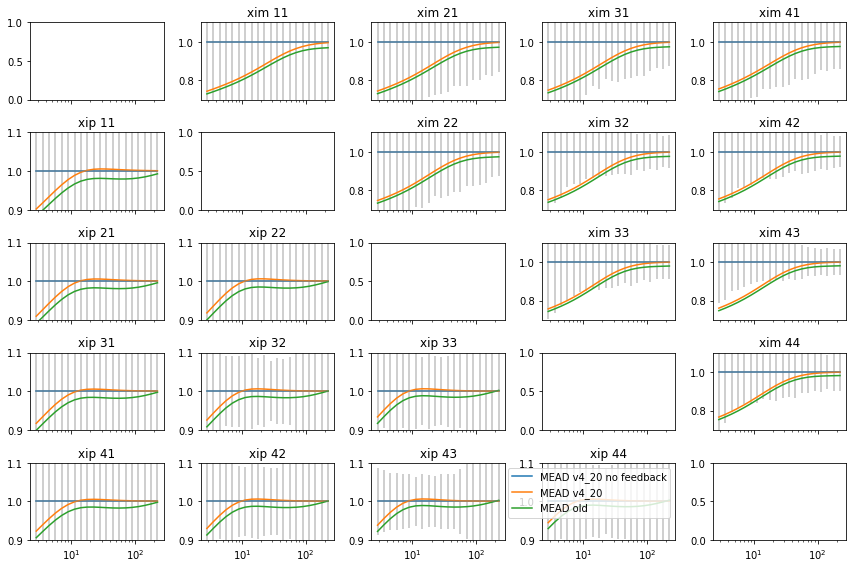

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d

path_base = '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/'
path_HM_code_old = 'output_MEAD_old'
path_HM_code = 'output_MEAD_v4_20'
path_HM_code_nofeedback = 'output_MEAD_v4_20_nofeedback'

fig, ax = plt.subplots(5,5,sharex=True, figsize=(12,8))
fig.subplots_adjust(wspace=0.2,hspace=0.2)

for i in range(4):
    for j in range(4):
     if i>=j:
        binx = [i,j]
        
        # MEAD_v4_20 with NO feedback *******
        mute1 = np.loadtxt(path_base+path_HM_code_nofeedback+'/shear_xi_plus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        mute_theta = np.loadtxt(path_base+path_HM_code_nofeedback+'/shear_xi_plus/theta.txt')*60./((2*math.pi)/360)
        mask = (mute_theta>0.) & (mute_theta<300)
        ax[i+1,j].plot(mute_theta[mask],mute1[mask]/mute1[mask], label='MEAD v4_20 no feedback')


        
        # MEAD_v4_20 with baryons *******
        mute = np.loadtxt(path_base+path_HM_code+'/shear_xi_plus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        ax[i+1,j].plot(mute_theta[mask],mute[mask]/mute1[mask], label='MEAD v4_20')

        
        # MEAD_old with baryons *******
        mute = np.loadtxt(path_base+path_HM_code_old+'/shear_xi_plus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        ax[i+1,j].plot(mute_theta[mask],mute[mask]/mute1[mask], label='MEAD old')
        
        # dv
        ax[i+1,j].set_title( 'xip {0}{1}'.format(binx[0]+1,binx[1]+1))
        err = meas['shearshear_y3']['{0}_{1}'.format(binx[0],binx[1])]['err_p']
        ax[i+1,j].errorbar(mute_theta[mask],np.ones(len(mute_theta[mask])),err/mute1[mask],color='grey',alpha = 0.5)
        ax[i+1,j].set_ylim([0.9,1.1])
        
        # xi minus **********
        binx = [i,j]
        # MEAD_v4_20 with NO feedback *******
        mute1 = np.loadtxt(path_base+path_HM_code_nofeedback+'/shear_xi_minus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        mute_theta = np.loadtxt(path_base+path_HM_code_nofeedback+'/shear_xi_minus/theta.txt')*60./((2*math.pi)/360)
        mask = (mute_theta>2) & (mute_theta<300)
        ax[j,i+1].plot(mute_theta[mask],mute1[mask]/mute1[mask], label='MEAD v4_20 no feedback')


        
        # MEAD_v4_20 with baryons *******
        mute = np.loadtxt(path_base+path_HM_code+'/shear_xi_minus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        ax[j,i+1].plot(mute_theta[mask],mute[mask]/mute1[mask], label='MEAD v4_20')

        
        # MEAD_old with baryons *******
        mute = np.loadtxt(path_base+path_HM_code_old+'/shear_xi_minus/bin_{0}_{1}.txt'.format(binx[0]+1,binx[1]+1))
        ax[j,i+1].plot(mute_theta[mask],mute[mask]/mute1[mask], label='MEAD old')

        
        # dv
        ax[j,i+1].set_title( 'xim {0}{1}'.format(binx[0]+1,binx[1]+1))
        err = meas['shearshear_y3']['{0}_{1}'.format(binx[0],binx[1])]['err_m']
        ax[j,i+1].errorbar(mute_theta[mask],np.ones(len(mute_theta[mask])),err/mute1[mask],color='grey',alpha = 0.5)
        ax[j,i+1].set_ylim([0.7,1.1])
        
plt.xscale('log')

plt.tight_layout()

ax[4,3].legend()


# tests old vs new mead

In [460]:
%matplotlib inline
import matplotlib.pyplot as plt
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')
    

    
old = load_obj('tests_mead_old')
new = load_obj('tests_mead_new')

keys =[key for key in old.keys()]



key = keys[5]
print (key)
key = 'mass_h'
new['bt_out']


um_20


array([[1.        , 1.        , 1.        , ..., 0.98340714, 0.98340714,
        0.98340714],
       [1.        , 1.        , 1.        , ..., 0.98388445, 0.98388445,
        0.98388445],
       [1.        , 1.        , 1.        , ..., 0.98434991, 0.98434991,
        0.98434991],
       ...,
       [1.        , 1.        , 1.        , ..., 0.9974308 , 0.9974308 ,
        0.9974308 ],
       [1.        , 1.        , 1.        , ..., 0.99745882, 0.99745882,
        0.99745882],
       [1.        , 1.        , 1.        , ..., 0.99748635, 0.99748635,
        0.99748635]])

(400, 256)
(400, 256)
(400, 1000)


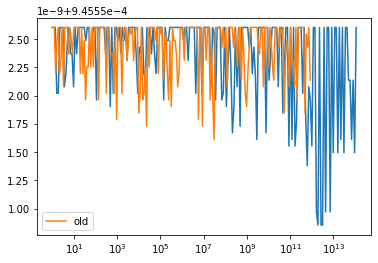

In [470]:
ki = 90
mh_aa= new['mass_h'][ki,:200]
print (new['um_55'].shape)
yy = (new['um_55'][ki,:200])
plt.plot(mh_aa,yy)
print (new['um_45'].shape)


print (old['um_15'].shape)
mh_a= old['mass_h'][ki,:200]
y=(old['um_55'][ki,:200])
plt.plot(mh_a,y,label ='old')
mh_a= old['mass_h'][ki,:200]

plt.xscale('log')
plt.legend()

In [453]:
new

{'um_1': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
         6.21996296e-05, 5.47052332e-05, 4.35914553e-05],
        [9.99999583e-01, 1.00000000e+00, 9.99999702e-01, ...,
         5.63060785e-05, 5.23427443e-05, 4.41863558e-05],
        [1.00000000e+00, 1.00000000e+00, 9.99999702e-01, ...,
         5.24092175e-05, 4.77313952e-05, 3.74378906e-05]]),
 'um_5': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [

In [427]:
min(new['g_100'].flatten())

0.0